
#Feature Importance with Pycart


In [ ]:
# Installation
!pip install pycaret

     |████████████████████████████████| 266kB 14.1MB/s 
     |████████████████████████████████| 112kB 21.4MB/s 
     |████████████████████████████████| 276kB 24.5MB/s 
     |████████████████████████████████| 1.7MB 24.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 256kB 51.6MB/s 
     |████████████████████████████████| 81kB 11.0MB/s 
     |████████████████████████████████| 1.4MB 60.3MB/s 
     |████████████████████████████████| 6.8MB 49.8MB/s 
     |████████████████████████████████| 61kB 9.5MB/s 
     |████████████████████████████████| 2.0MB 54.2MB/s 
     |████████████████████████████████| 174kB 60.7MB/s 
     |████████████████████████████████| 14.2MB 55.3MB/s 
     |████████████████████████████████| 3.1MB 55.3MB/s 
     |████████████████████████████████| 81kB 11.5MB/s 
     |████████████████████████████████| 645kB 45.3

In [ ]:
# Load EDA Packages
import pandas as pd


In [ ]:
df01 = pd.read_csv("hd_gm_fixed.csv")

In [ ]:
df01.head()

,STR_ALIAS,date_snap,weekly_sales_amt,weekly_shrink_amount,ty_net_shrink,ty_inv_sls,inv_cnt,cycle_length,FET_FLG,LU_FLG,urban,suburban,rural,rgn_nm,us_unemployment_rate_16_24,us_unemployment_rate,fyfw_prd_bgn,fyfw_prd_end,str_fet_wk_cnt,net_sls_amt,rtn_amt_rt,rtn_trans_rt,mkup_rt,rsn_01_rt,rsn_02_rt,dc_dmg_rt,str_dmg_rt,cust_sat_rt,rsn_06_rt,str_use_rt,rsn_09_rt,rdtag_rt,rsn_12_rt,rsn_15_rt,rsn_18_rt,rsn_22_rt,rsn_23_rt,rsn_24_rt,rsn_25_rt,promo_rt,...,inval_unt_intrvntn_rt,cash_pen,sco_pen,key_sku_rt,qty_key_rt,gen_sku_rt,d90_cash_vs_total,d90_sco_vs_total,d90_cash_vs_main,d90_sco_vs_main,attr_rt,quick_term_rt,avg_tenure,avg_wage,pt_ratio,int_cnt,int_val,ext_cnt,ext_val,known_theft_cnt,known_theft_val,merch_recov_cnt,merch_recov_val,pos_recov_cnt,pos_recov_val,risk_avt_cnt,risk_avt_val,lowes_flag,lowes_cnt,menards_flag,menards_cnt,avg_osha_rt,aci_score,cap_index,online_sat_voc_num,online_sat_voc_den,online_sat_voc_pct,zip_code,shrink_rate,state
0,1001,10/2/17,556736.78,10426.57,611648.84,32660070.09,3,55,0,1,0,1,0,MIDSOUTH,8.7,4.1,201635,201735,0,22038030.28,-0.149609,0.101869,0.009331,0.000324,0.000773,0.000211,0.007403,0.004279,0.000131,0.000503,0.009140,0.001536,0.001531,0.001433,0.000005,0.000058,0.001622,0.000765,0.001998,0.007829,...,0.25065,0.282240,0.110415,0.059294,0.034961,0.000064,0.418338,0.155321,0.729245,0.270755,0.010618,0.208333,5.412885,12.605000,0.633269,2,1844.75,7,7407.0,3,1800.0,18,12339.19,0,0.00,2,814.72,1,5,0,0,0.815405,0,0,164.08,193,0.850155,30096,0.018728,GA
1,1001,10/9/17,557228.39,10435.77,611648.84,32660070.09,3,55,0,1,0,1,0,MIDSOUTH,8.7,4.1,201636,201736,0,22559095.42,-0.150751,0.101917,0.009346,0.000317,0.000774,0.000221,0.007390,0.004273,0.000128,0.000549,0.009109,0.001554,0.001549,0.001440,0.000005,0.000057,0.001656,0.000755,0.002017,0.007692,...,0.25065,0.282114,0.110415,0.059323,0.034963,0.000069,0.418329,0.155359,0.729192,0.270808,0.010769,0.205479,5.411538,12.604808,0.633269,2,1844.75,7,7407.0,3,1800.0,18,12339.19,0,0.00,2,814.72,1,5,0,0,0.815405,0,0,164.23,193,0.850933,30096,0.018728,GA
2,1001,10/16/17,599390.85,11225.39,611648.84,32660070.09,3,55,0,1,0,1,0,MIDSOUTH,8.7,4.1,201637,201737,0,23073264.01,-0.151623,0.102010,0.009298,0.000313,0.000762,0.000221,0.007410,0.004266,0.000128,0.000548,0.009008,0.001568,0.001563,0.001447,0.000005,0.000055,0.001655,0.000755,0.002045,0.007553,...,0.25065,0.282093,0.110415,0.059364,0.034979,0.000068,0.419431,0.155190,0.729926,0.270074,0.010324,0.214286,5.407885,12.603462,0.633654,2,1844.75,7,7407.0,2,1042.0,17,11909.38,0,0.00,2,814.72,1,5,0,0,0.815405,0,0,163.67,193,0.848031,30096,0.018728,GA
3,1001,10/23/17,549696.03,10294.71,611648.84,32660070.09,3,55,0,1,0,1,0,MIDSOUTH,8.7,4.1,201638,201738,0,23634939.47,-0.151075,0.102063,0.009369,0.000319,0.000751,0.000216,0.007434,0.004222,0.000127,0.000549,0.008942,0.001559,0.001554,0.001446,0.000005,0.000072,0.001672,0.000741,0.002087,0.007423,...,0.25065,0.282017,0.110415,0.059451,0.034974,0.000064,0.419698,0.155206,0.730031,0.269969,0.010174,0.217391,5.406538,12.603269,0.634038,2,1844.75,7,7407.0,3,1301.0,18,12106.27,1,239.85,2,814.72,1,5,0,0,0.815405,0,0,162.96,191,0.853194,30096,0.018728,GA
4,1001,10/30/17,639228.97,11971.48,611648.84,32660070.09,3,55,0,1,0,1,0,MIDSOUTH,8.7,4.1,201639,201739,0,24155476.07,-0.151058,0.102077,0.009518,0.000380,0.000751,0.000220,0.007457,0.004198,0.000124,0.000551,0.008897,0.001535,0.001531,0.001463,0.000004,0.000071,0.001683,0.000735,0.002087,0.007440,...,0.25065,0.282124,0.110415,0.059494,0.034875,0.000061,0.420342,0.156345,0.728891,0.271109,0.010172,0.217391,5.405962,12.603269,0.634038,2,1844.75,7,7407.0,3,1301.0,19,12305.27,1,239.85,2,814.72,1,5,0,0,0.815405,0,0,161.74,189,0.855767,30096,0.018728,GA


In [ ]:
df01.shape

(96900, 142)

In [ ]:
# Final check for missing values
df01.isnull().sum

<bound method DataFrame.sum of        STR_ALIAS  date_snap  weekly_sales_amt  ...  zip_code  shrink_rate  state
0          False      False             False  ...     False        False  False
1          False      False             False  ...     False        False  False
2          False      False             False  ...     False        False  False
3          False      False             False  ...     False        False  False
4          False      False             False  ...     False        False  False
...          ...        ...               ...  ...       ...          ...    ...
96895      False      False             False  ...     False        False  False
96896      False      False             False  ...     False        False  False
96897      False      False             False  ...     False        False  False
96898      False      False             False  ...     False        False  False
96899      False      False             False  ...     False        False  Fal

In [ ]:
# Columns
#pd.set_option("display.max_rows", None, "display.max_columns", None,'display.max_colwidth', None)
pd.options.display.max_columns = None

df01.columns

Index(['STR_ALIAS', 'date_snap', 'weekly_sales_amt', 'weekly_shrink_amount',
       'ty_net_shrink', 'ty_inv_sls', 'inv_cnt', 'cycle_length', 'FET_FLG',
       'LU_FLG',
       ...
       'menards_cnt', 'avg_osha_rt', 'aci_score', 'cap_index',
       'online_sat_voc_num', 'online_sat_voc_den', 'online_sat_voc_pct',
       'zip_code', 'shrink_rate', 'state'],
      dtype='object', length=142)

In [ ]:
# Since max_columns does not work
print(df01.columns.tolist())


['STR_ALIAS', 'date_snap', 'weekly_sales_amt', 'weekly_shrink_amount', 'ty_net_shrink', 'ty_inv_sls', 'inv_cnt', 'cycle_length', 'FET_FLG', 'LU_FLG', 'urban', 'suburban', 'rural', 'rgn_nm', 'us_unemployment_rate_16_24', 'us_unemployment_rate', 'fyfw_prd_bgn', 'fyfw_prd_end', 'str_fet_wk_cnt', 'net_sls_amt', 'rtn_amt_rt', 'rtn_trans_rt', 'mkup_rt', 'rsn_01_rt', 'rsn_02_rt', 'dc_dmg_rt', 'str_dmg_rt', 'cust_sat_rt', 'rsn_06_rt', 'str_use_rt', 'rsn_09_rt', 'rdtag_rt', 'rsn_12_rt', 'rsn_15_rt', 'rsn_18_rt', 'rsn_22_rt', 'rsn_23_rt', 'rsn_24_rt', 'rsn_25_rt', 'promo_rt', 'rsn_30_rt', 'rsn_33_rt', 'rsn_40_rt', 'rsn_41_rt', 'rsn_48_rt', 'rsn_49_rt', 'pc_rsn_24_rt', 'pc_rsn_25_rt', 'pc_rsn_27_rt', 'cull_mkdn_rt', 'rtv_crt_retl', 'rtv_del_retl', 'avg_inv_turns', 'yr_inv_turns', 'clear_inv_pct', 'ops_net_oh_unt_qty', 'ops_net_oh_retl_amt', 'theft_net_oh_unt_qty', 'theft_net_oh_retl_amt', 'net_oh_unt_qty', 'net_oh_retl_amt', 'net_adj_freq', 'neg_oh_unt_qty', 'neg_oh_retl_amt', 'neg_adj_freq', 'po

In [ ]:
df01.describe()

,STR_ALIAS,weekly_sales_amt,weekly_shrink_amount,ty_net_shrink,ty_inv_sls,inv_cnt,cycle_length,FET_FLG,LU_FLG,urban,suburban,rural,us_unemployment_rate_16_24,us_unemployment_rate,fyfw_prd_bgn,fyfw_prd_end,str_fet_wk_cnt,net_sls_amt,rtn_amt_rt,rtn_trans_rt,mkup_rt,rsn_01_rt,rsn_02_rt,dc_dmg_rt,str_dmg_rt,cust_sat_rt,rsn_06_rt,str_use_rt,rsn_09_rt,rdtag_rt,rsn_12_rt,rsn_15_rt,rsn_18_rt,rsn_22_rt,rsn_23_rt,rsn_24_rt,rsn_25_rt,promo_rt,rsn_30_rt,rsn_33_rt,rsn_40_rt,rsn_41_rt,rsn_48_rt,rsn_49_rt,pc_rsn_24_rt,pc_rsn_25_rt,pc_rsn_27_rt,cull_mkdn_rt,rtv_crt_retl,rtv_del_retl,avg_inv_turns,yr_inv_turns,clear_inv_pct,ops_net_oh_unt_qty,ops_net_oh_retl_amt,theft_net_oh_unt_qty,theft_net_oh_retl_amt,net_oh_unt_qty,net_oh_retl_amt,net_adj_freq,neg_oh_unt_qty,neg_oh_retl_amt,neg_adj_freq,port_pwr_net_oh_unt_qty,port_pwr_net_oh_retl_amt,port_pwr_net_adj_freq,emp_pkg_retl_amt,emp_pkg_unt_qty,boss_ord_cnt,boss_can_cnt,boss_rtn_cnt,boss_can_pct,boss_rtn_pct,bopis_ord_cnt,bopis_can_cnt,bopis_rtn_cnt,bopis_can_pct,bopis_rtn_pct,bodfs_ord_cnt,bodfs_can_cnt,bodfs_rtn_cnt,bodfs_can_pct,bodfs_rtn_pct,nrr_unt_qty,nrr_retl_amt,auto_kr_cnt,exp_buy_back,net_inv_cnt_adj_unt_qty,net_inv_cnt_adj_retl_amt,boris_rtn_retl_amt,boris_rtn_unt_qty,boris_rtn_retl_pct,aft_audio_inval_scan_retl_amt,aft_intrvntn_inval_scan_retl_amt,aft_audio_inval_scan_unt_cnt,aft_intrvntn_inval_scan_unt_cnt,tot_inval_scan_retl_amt,tot_inval_scan_unt_cnt,tot_inval_scan_retl_pct,inval_sls_intrvntn_rt,inval_unt_intrvntn_rt,cash_pen,sco_pen,key_sku_rt,qty_key_rt,gen_sku_rt,d90_cash_vs_total,d90_sco_vs_total,d90_cash_vs_main,d90_sco_vs_main,attr_rt,quick_term_rt,avg_tenure,avg_wage,pt_ratio,int_cnt,int_val,ext_cnt,ext_val,known_theft_cnt,known_theft_val,merch_recov_cnt,merch_recov_val,pos_recov_cnt,pos_recov_val,risk_avt_cnt,risk_avt_val,lowes_flag,lowes_cnt,menards_flag,menards_cnt,avg_osha_rt,aci_score,cap_index,online_sat_voc_num,online_sat_voc_den,online_sat_voc_pct,zip_code,shrink_rate
count,96900.000000,9.690000e+04,96900.000000,9.690000e+04,9.690000e+04,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,9.690000e+04,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,9.690000e+04,96900.000000,9.690000e+04,96900.000000,9.690000e+04,96900.00000,96900.000000,9.690000e+04,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,9.690000e+04,96900.000000,96900.000000,9.690000e+04,9.690000e+04,9.690000e+04,96900.000000,96900.000000,9.690000e+04,96900.000000,96900.000000,96900.000000,9.690000e+04,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000,96900.0,96900.0,96900.000000,96900.000000,96900.000000,96900.000000,96900.000000
mean,1997.616078,9.260651e+05,20022.429902,1.091537e+06,5.207293e+07,2.699401,59.763261,0.339051,0.584169,0.146305,0.518246,0.332250,9.635815,4.703100,201771.570289,201871.287915,5.981930,4.356849e+07,-0.128270,0.092273,0.010565,0.0004

In [ ]:
# Value Count Plot
df01['weekly_shrink_amount'].value_counts()

18900.60    101
4110.87      94
40285.88     94
36717.87     87
17931.23     76
           ... 
12252.35      1
19684.81      1
10744.81      1
24786.15      1
15226.89      1
Name: weekly_shrink_amount, Length: 82874, dtype: int64

#Using PyCaret for ML

In [ ]:
import pycaret.regression


In [ ]:
# Methods/Attributes
dir(pycaret.regression)

['Any',
 'Dict',
 'Display',
 'List',
 'MLUsecase',
 'Optional',
 'Tuple',
 'Union',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'add_metric',
 'automl',
 'blend_models',
 'compare_models',
 'create_model',
 'deploy_model',
 'enable_colab',
 'ensemble_model',
 'evaluate_model',
 'finalize_model',
 'get_config',
 'get_logs',
 'get_metrics',
 'interpret_model',
 'io',
 'is_in_colab',
 'load_config',
 'load_model',
 'models',
 'np',
 'pd',
 'plot_model',
 'predict_model',
 'pull',
 'pycaret',
 'remove_metric',
 'save_config',
 'save_model',
 'set_config',
 'setup',
 'stack_models',
 'tune_model',
 'warnings']

In [ ]:
import pycaret.regression as reg

In [ ]:
dir(reg)

['Any',
 'Dict',
 'Display',
 'List',
 'MLUsecase',
 'Optional',
 'Tuple',
 'Union',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'add_metric',
 'automl',
 'blend_models',
 'compare_models',
 'create_model',
 'deploy_model',
 'enable_colab',
 'ensemble_model',
 'evaluate_model',
 'finalize_model',
 'get_config',
 'get_logs',
 'get_metrics',
 'interpret_model',
 'io',
 'is_in_colab',
 'load_config',
 'load_model',
 'models',
 'np',
 'pd',
 'plot_model',
 'predict_model',
 'pull',
 'pycaret',
 'remove_metric',
 'save_config',
 'save_model',
 'set_config',
 'setup',
 'stack_models',
 'tune_model',
 'warnings']

# Initialize and Setup
* setup
* initializes the environment in pycaret
* creates the transformation pipeline to prepare the data for ML
* from pycaret.utils import enable_colab
* enable_colab()

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
# Init
# Enter Y for all variables in dataset
# Specify % of data for train/test/split
from pycaret.regression import *
m=setup(df01,target='weekly_shrink_amount', feature_selection = True)

,Description,Value
0,session_id,3784
1,Target,weekly_shrink_amount
2,Original Data,"(96900, 142)"
3,Missing Values,False
4,Numeric Features,125
5,Categorical Features,15
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(67829, 238)"


In [ ]:
# Ignore A Column
# s=setup(df01,target='weekly_shrink_amount',ignore_features=['name','name'])
df01.shape # To verify how may column remain

(96900, 142)

# Compare Multiple Models and their Accuracy Metrics
* Similar to Classification Report,AUC,F1 Score
* For Classification Problems
  * Classification report
  * AUC,Recall,Precision,F1 score, Kappa
* For Regression Problems
  * MAE, MSE, RMSE, R2, RMSLE and MAPE

In [ ]:
# Compare Models
# compare_models()
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,156.6985,2.549064e+05,501.9981,0.9986,0.0359,0.0161,212.952
et,Extra Trees Regressor,186.1929,2.530014e+05,501.4719,0.9986,0.0327,0.0257,103.924
lightgbm,Light Gradient Boosting Machine,341.2366,3.040328e+05,549.6917,0.9983,0.0482,0.0416,2.700
dt,Decision Tree Regressor,292.8781,6.044494e+05,772.7778,0.9967,0.0356,0.0159,3.586
gbr,Gradient Boosting Regressor,770.5798,1.359776e+06,1165.8646,0.9926,0.0818,0.0969,75.421
lasso,Lasso Regression,1229.3437,3.601142e+06,1897.3415,0.9803,0.2700,0.1912,4.700
omp,Orthogonal Matching Pursuit,1252.0651,3.777288e+06,1943.3118,0.9793,0.2965,0.2035,0.088
ridge,Ridge Regression,1258.4052,3.865264e+06,1964.3925,0.9788,0.2788,0.1905,0.333
en,Elastic Net,1258.6320,3.984230e+06,1995.6470,0.9782,0.2806,0.1967,4.683
lr,Linear Regression,1266.5664,4.060846e+06,2014.7372,0.9778,0.2827,0.1982,0.498


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=3784, verbose=0, warm_start=False)

In [ ]:
# Compare models
# But ignore the models in the blacklist
# compare_models(blacklist=['br', 'knn', 'par', 'llar', 'ridge'])

# Narative
  * Pycaret builds a model using several algorithms and compare the best
  * It automatically sort them from the best accuracy to the least
  * It highlight the best model according to the classification report metrics
# Creating the Model
  *Select the best model
  *cross validation
  *Perform CV K-Fold (10 default) for the selected model #Makes no sense since its time series.
  

In [ ]:
!pip install neatutils


In [ ]:
# Simple Tools to Get The Short/Abbrev for an Estimator/Ml Algorithm
#! pip install neatutils
import neatutils
neatutils.get_abbrev('Lasso Regression')

'lasso'

In [ ]:
# Create the model
# lasso = create_model('lasso')

In [ ]:
#rf = create_model('rf')

In [ ]:
df01.head()


,STR_ALIAS,date_snap,weekly_sales_amt,weekly_shrink_amount,ty_net_shrink,ty_inv_sls,inv_cnt,cycle_length,FET_FLG,LU_FLG,urban,suburban,rural,rgn_nm,us_unemployment_rate_16_24,us_unemployment_rate,fyfw_prd_bgn,fyfw_prd_end,str_fet_wk_cnt,net_sls_amt,rtn_amt_rt,rtn_trans_rt,mkup_rt,rsn_01_rt,rsn_02_rt,dc_dmg_rt,str_dmg_rt,cust_sat_rt,rsn_06_rt,str_use_rt,rsn_09_rt,rdtag_rt,rsn_12_rt,rsn_15_rt,rsn_18_rt,rsn_22_rt,rsn_23_rt,rsn_24_rt,rsn_25_rt,promo_rt,...,inval_unt_intrvntn_rt,cash_pen,sco_pen,key_sku_rt,qty_key_rt,gen_sku_rt,d90_cash_vs_total,d90_sco_vs_total,d90_cash_vs_main,d90_sco_vs_main,attr_rt,quick_term_rt,avg_tenure,avg_wage,pt_ratio,int_cnt,int_val,ext_cnt,ext_val,known_theft_cnt,known_theft_val,merch_recov_cnt,merch_recov_val,pos_recov_cnt,pos_recov_val,risk_avt_cnt,risk_avt_val,lowes_flag,lowes_cnt,menards_flag,menards_cnt,avg_osha_rt,aci_score,cap_index,online_sat_voc_num,online_sat_voc_den,online_sat_voc_pct,zip_code,shrink_rate,state
0,1001,10/2/17,556736.78,10426.57,611648.84,32660070.09,3,55,0,1,0,1,0,MIDSOUTH,8.7,4.1,201635,201735,0,22038030.28,-0.149609,0.101869,0.009331,0.000324,0.000773,0.000211,0.007403,0.004279,0.000131,0.000503,0.009140,0.001536,0.001531,0.001433,0.000005,0.000058,0.001622,0.000765,0.001998,0.007829,...,0.25065,0.282240,0.110415,0.059294,0.034961,0.000064,0.418338,0.155321,0.729245,0.270755,0.010618,0.208333,5.412885,12.605000,0.633269,2,1844.75,7,7407.0,3,1800.0,18,12339.19,0,0.00,2,814.72,1,5,0,0,0.815405,0,0,164.08,193,0.850155,30096,0.018728,GA
1,1001,10/9/17,557228.39,10435.77,611648.84,32660070.09,3,55,0,1,0,1,0,MIDSOUTH,8.7,4.1,201636,201736,0,22559095.42,-0.150751,0.101917,0.009346,0.000317,0.000774,0.000221,0.007390,0.004273,0.000128,0.000549,0.009109,0.001554,0.001549,0.001440,0.000005,0.000057,0.001656,0.000755,0.002017,0.007692,...,0.25065,0.282114,0.110415,0.059323,0.034963,0.000069,0.418329,0.155359,0.729192,0.270808,0.010769,0.205479,5.411538,12.604808,0.633269,2,1844.75,7,7407.0,3,1800.0,18,12339.19,0,0.00,2,814.72,1,5,0,0,0.815405,0,0,164.23,193,0.850933,30096,0.018728,GA
2,1001,10/16/17,599390.85,11225.39,611648.84,32660070.09,3,55,0,1,0,1,0,MIDSOUTH,8.7,4.1,201637,201737,0,23073264.01,-0.151623,0.102010,0.009298,0.000313,0.000762,0.000221,0.007410,0.004266,0.000128,0.000548,0.009008,0.001568,0.001563,0.001447,0.000005,0.000055,0.001655,0.000755,0.002045,0.007553,...,0.25065,0.282093,0.110415,0.059364,0.034979,0.000068,0.419431,0.155190,0.729926,0.270074,0.010324,0.214286,5.407885,12.603462,0.633654,2,1844.75,7,7407.0,2,1042.0,17,11909.38,0,0.00,2,814.72,1,5,0,0,0.815405,0,0,163.67,193,0.848031,30096,0.018728,GA
3,1001,10/23/17,549696.03,10294.71,611648.84,32660070.09,3,55,0,1,0,1,0,MIDSOUTH,8.7,4.1,201638,201738,0,23634939.47,-0.151075,0.102063,0.009369,0.000319,0.000751,0.000216,0.007434,0.004222,0.000127,0.000549,0.008942,0.001559,0.001554,0.001446,0.000005,0.000072,0.001672,0.000741,0.002087,0.007423,...,0.25065,0.282017,0.110415,0.059451,0.034974,0.000064,0.419698,0.155206,0.730031,0.269969,0.010174,0.217391,5.406538,12.603269,0.634038,2,1844.75,7,7407.0,3,1301.0,18,12106.27,1,239.85,2,814.72,1,5,0,0,0.815405,0,0,162.96,191,0.853194,30096,0.018728,GA
4,1001,10/30/17,639228.97,11971.48,611648.84,32660070.09,3,55,0,1,0,1,0,MIDSOUTH,8.7,4.1,201639,201739,0,24155476.07,-0.151058,0.102077,0.009518,0.000380,0.000751,0.000220,0.007457,0.004198,0.000124,0.000551,0.008897,0.001535,0.001531,0.001463,0.000004,0.000071,0.001683,0.000735,0.002087,0.007440,...,0.25065,0.282124,0.110415,0.059494,0.034875,0.000061,0.420342,0.156345,0.728891,0.271109,0.010172,0.217391,5.405962,12.603269,0.634038,2,1844.75,7,7407.0,3,1301.0,19,12305.27,1,239.85,2,814.72,1,5,0,0,0.815405,0,0,161.74,189,0.855767,30096,0.018728,GA


In [ ]:
# tuned_lalsso = tune_model(lasso)


In [ ]:
# tuned_lasso = tune_model(lasso, n_iter = 50)


In [ ]:
# print(tuned_lalsso)


In [ ]:
# print(tuned_lasso)


In [ ]:
# tuned_lasso_optimized = tuned_lasso_model('lasso',optimize='R2')


In [ ]:
# evaluate_model(tuned_lasso)


In [ ]:
# Plot Performance of Model
# plot_model(tuned_lasso)

In [ ]:
# Feature Importance
# plot_model(tuned_lasso,plot='feature')

In [ ]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,294.0832,677838.7174,823.3096,0.9962,0.0652,0.0181
1,317.0600,771038.0462,878.0877,0.9959,0.0319,0.0168
2,312.5215,705817.8174,840.1296,0.9962,0.0298,0.0161
3,275.5618,440073.8220,663.3806,0.9976,0.0408,0.0153
4,302.1796,838871.6433,915.8994,0.9952,0.0286,0.0157
5,281.5868,587910.6813,766.7533,0.9967,0.0272,0.0149
6,284.6866,498303.7737,705.9063,0.9971,0.0453,0.0158
7,283.4004,432290.7162,657.4882,0.9977,0.0275,0.0156
8,290.9928,501317.3422,708.0377,0.9973,0.0285,0.0157
9,286.7080,591031.1009,768.7855,0.9969,0.0315,0.0155


In [ ]:
tuned_dt = tune_model(dt)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2157.7091,1.147910e+07,3388.0818,0.9365,0.2175,0.3550
1,2204.6334,1.286198e+07,3586.3601,0.9309,0.1878,0.1345
2,2189.5845,1.209293e+07,3477.4887,0.9352,0.1854,0.1324
3,2127.8585,1.255106e+07,3542.7479,0.9329,0.2218,0.1462
4,2228.3305,1.275995e+07,3572.1073,0.9274,0.1856,0.1325
5,2248.4113,1.260745e+07,3550.6966,0.9301,0.1935,0.1384
6,2173.9845,1.241953e+07,3524.1352,0.9284,0.1845,0.1305
7,2257.9260,1.295133e+07,3598.7954,0.9309,0.1974,0.1381
8,2084.0320,1.153029e+07,3395.6274,0.9374,0.1789,0.1244
9,2490.9158,1.681158e+07,4100.1928,0.9111,0.2325,1.7698


In [ ]:
fine_tuned_dt = tune_model(dt, n_iter = 50)


IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,02:06:16
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Decision Tree Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE


Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 144.7min


KeyboardInterrupt: ignored

In [ ]:
print(tuned_dt)
# print(fine_tuned_dt)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=15,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.3, min_impurity_split=None,
                      min_samples_leaf=6, min_samples_split=9,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=3784, splitter='best')


In [ ]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

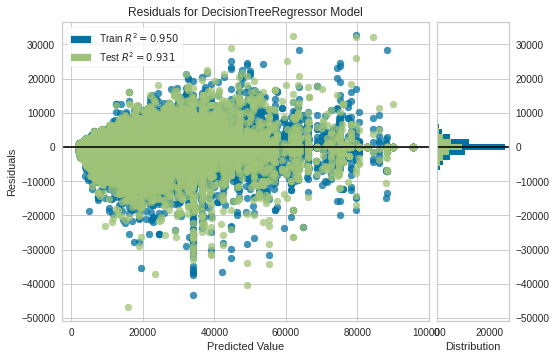

In [ ]:
plot_model(tuned_dt)

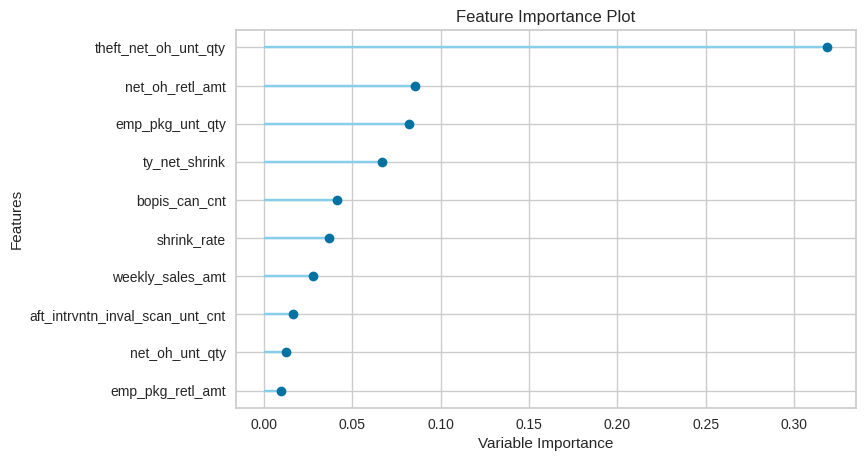

In [ ]:
plot_model(tuned_dt,plot='feature')